# 处理文本数据

## Step 1 分词

### 读取小规模样本，并统计字符数，输出前100个字符

In [55]:
data_path = "the-verdict.txt"
with open (data_path,"r",encoding = "utf-8") as f:
    data = f.read()
print(f"总字符数为: {len(data)}")
print(f"前100个字符:{data[:100]}")

总字符数为: 20479
前100个字符:I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


### 使用 Python 的正则表达式库 re 进行拆分。（注意，不需要学习或记住任何正则表达式语法，因为在本章后面我们将使用一个预构建的分词器。）

In [56]:
import re 
text = "Hello, world. This, is a test."
result = re.split(r'(\s)',text)
print(result)
# 执行结果是一个包含单词、空白和标点符号的列表

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


### 请注意，上述简单的分词方案仅仅用于将示例文本拆分为单个单词，然而有些单词仍然与我们希望单独列出的标点符号相连。我们也无需将所有文本转换为小写字母，因为大写字母有助于 LLM 区分专有名词和普通名词，理解句子结构，并学习生成正确的大写文本。


In [57]:
# 修改正则表达式，将空白字符(\s)、逗号和句号([,.])都拆分开来
import re 
text = "Hello, world. This, is a test."
result0 = re.split(r'([,.]|\s)',text) # 把“逗号或句号”([,.]) 和 “任何空白”(\s) 当作两个独立的分隔符来切分
result1 = re.split(r'([,.]\s)',text) # 逗号或句号后紧跟一个空白”作为一个整体分隔符
print(result0)
print(result1)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']
['Hello', ', ', 'world', '. ', 'This', ', ', 'is a test.']


### 删除空白字符

In [58]:
# 修改正则表达式，将空白字符(\s)、逗号和句号([,.])都拆分开来
import re 
text = "Hello, world. This, is a test."
result = re.split(r'([,.]|\s)',text)
result = [token for token in result if token.strip()]
print(result)


['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


**关于是否删除空白字符的探讨**: 

在开发一个简单的分词器时，是否将空白字符编码为单独的字符，或者直接将其删除，取决于我们的应用和需求。删除空白字符可以减少内存和计算资源的消耗。然而，如果我们训练的模型对文本的确切结构敏感（例如，Python 代码对缩进和空格非常敏感），那么保留空白字符就很有用。在这里，为了简化和缩短分词化输出，我们选择删除空白字符。稍后，我们将切换到一个包含空白字符的分词化方案。

### 继续修改以增加适配

In [59]:
import re 
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)',text)
result0 = [token for token in result if token.strip()]
result1 = [token.strip() for token in result if token.strip()]
print(result0)
print(result1)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']
['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


### 处理整个文本

In [60]:
import re 
data_path = "the-verdict.txt"
with open (data_path,"r",encoding = "utf-8") as f:
    data = f.read()
print(f"总字符数为: {len(data)}")
result = re.split(r'([,.:;?_!"()\']|--|\s)',data)
result = [token.strip() for token in result if token.strip()]
print(len(result))
print(result[:30])

总字符数为: 20479
4690
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


## Step 2 tokens->Ids

In [61]:
# set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，还可以计算交集、差集、并集等。
# sorted() 排序函数，正序
# sorted(，reverse=True) 倒序

all_words = sorted(set(result))
vocab_size = len(all_words)
print(vocab_size)

1130


In [62]:
vocab = {token:integer for integer,token in enumerate(all_words)} # enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
for i,item in enumerate(vocab.items()):
    print(item)
    if i>50: # 只展示前50个
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)
('His', 51)


## Step 3 实现完整的分词器

In [63]:
import re
class TokenizerV1:
    def __init__(self,vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [token.strip() for token in preprocessed if token.strip()]
        Ids = [self.str_to_int[token] for token in preprocessed]
        return Ids
    
    def decode(self, ids):                                                        
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)  # re.sub 删除指定内容，'\0'指保留'\s，'\1'指保留[,.?!"()\']                       
        return text
    
# data_path = "the-verdict.txt"
# with open (data_path,"r",encoding = "utf-8") as f:
#     data = f.read()
data = """"It's the last he painted, you know," Mrs. Gisburn said with pardonable pride."""
Tokenizer = TokenizerV1(vocab)
ids = Tokenizer.encode(data)
print(ids)
str = Tokenizer.decode(ids)
print(str)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]
" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


#### str->int 示例

In [64]:
tokenizer = TokenizerV1(vocab)
text = """"It's the last he painted, you know," Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


#### int->str 示例

In [65]:
str = tokenizer.decode(ids)
print(str)

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [66]:
# 遇到生词，会出现键错误
tokenizer = TokenizerV1(vocab)
text = "fuck"
ids = tokenizer.encode(text)
print(ids)

KeyError: 'fuck'

## 添加特殊上下文token

在上一节中，我实现了一个简单的分词器，并将其应用于训练集中的一段文本。在本节中，我将修改这个分词器来处理未知单词。

具体来说，我将修改在前一节中实现的词汇表和分词器类（修改后的类命名为TokenizerV2），以支持两个新的token：<|unk|> 和 <|endoftext|>

* 遇到不在词汇表中的单词时使用一个<|unk|> token

* 在不相关的文本之间添加一个特殊的<|endoftext|> token。例如，在对多个独立文档或书籍进行GPT类大语言模型的训练时，通常会在每个文档或书籍之前插入一个token，以连接前一个文本源

In [70]:
# 添加到词汇表中

all_tokens = sorted(list(set(result)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}

# 也可以如下这么写
# all_tokens = sorted(set(result))
# vocab = {token:integer for integer,token in enumerate(all_tokens)}
# vocab["<|endoftext|>"] = len(vocab)
# vocab["<|unk|>"] = len(vocab)
print(len(vocab.items()))
for i, item in enumerate(list(vocab.items())[-5:]):
      print(item)

1132
('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [ ]:
# 冲新写分词器

import re
class TokenizerV2:
    def __init__(self,vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [token.strip() for token in preprocessed if token.strip()]
        preprocessed = [token if token in self.str_to_int 
                        else "<|unk|>" for token in preprocessed]
        Ids = [self.str_to_int[token] for token in preprocessed]
        return Ids
    
    def decode(self, ids):                                                        
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)  # re.sub 删除指定内容，'\0'指保留'\s，'\1'指保留[,.?!"()\']                       
        return text
    
# Tokenizer2 = TokenizerV2(vocab)
# str = "yourself fuck"
# ids = Tokenizer2.encode(str)
# print(ids)

[1129, 1131]


In [80]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [82]:
tokenizer = TokenizerV2(vocab)
print(tokenizer.encode(text))
print(tokenizer.decode(tokenizer.encode(text)))

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]
<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


**Note**:

到目前为止，我们已经讨论了分词作为处理文本输入到 LLM 中的重要步骤。根据不同的 LLM，一些研究人员还考虑其他特殊token，例如以下几种：

* [BOS]（序列开始）：这个token表示文本的起始位置，指示 LLM 内容的开始。
* [EOS]（序列结束）：这个token位于文本的末尾，在连接多个无关文本时特别有用，类似于 <|endoftext|>。例如，在合并两个不同的维基百科文章或书籍时， [EOS] token指示一篇文章结束和下一篇文章开始。
* [PAD]（填充）：在使用大于 1 的批量大小数据集训练 LLM 时，批量可能包含不同长度的文本。为了确保所有文本长度一致，较短的文本会用 [PAD] token进行扩展或填充，直到达到批量中最长文本的长度。

请注意，用于 GPT 模型的分词器不需要上述提到的任何token，而只使用 <|endoftext|> token以简化处理。<|endoftext|> 类似于上面提到的 [EOS] token。此外，<|endoftext|> 也用作填充。然而，正如我们将在后续章节中探讨的那样，在批量输入的训练中，我们通常使用掩码，这意味着我们不会关注填充的token。因此，选择用于填充的特定token变得无关紧要。

**Tip**:

在训练神经网络时，通常会将不同长度的句子或文本批处理为一个 batch 进行并行训练。然而，不同长度的句子需要补齐到同一长度（基于矩阵运算要求形状一致），这时就需要填充 token 来对齐所有序列的长度，使得模型能够有效处理不同长度的输入。掩码其实就是一个标志位，用来告诉大模型哪些位置需要关注，哪些可以忽略，例如考虑以下句子：

* 句子1："I love NLP."

* 句子 2："Transformers are powerful."

* 句子 3："GPT is amazing."

为了将它们放入一个批次，我们需要将它们填充到相同的长度。假设最长句子的长度为 5（token 数量），因此每个句子需要填充到 5 个 token。填充时，GPT 使用 <|endoftext|> 作为填充标记。在输入批次时，我们为每个 token 位置创建一个掩码矩阵，用来标识哪些位置是有效 token（模型应该关注），哪些是填充 token（模型应该忽略）。假设 1 表示有效 token，0 表示填充 token，则掩码矩阵如下：

* 句子1（掩码矩阵）：[1, 1, 1, 1, 0]

* 句子2（掩码矩阵）：[1, 1, 1, 1, 0]

*  句子3（掩码矩阵）：[1, 1, 1, 1, 0]

在这个掩码矩阵中，1 表示模型会关注的 token，0 表示模型会忽略的填充 token。通过这种掩码矩阵，模型知道在计算和训练时哪些 token 是有效内容，哪些 token 是填充部分，无需关注。

## 字节对编码（Byte pair encoding）

### 一种基于字节对编码（BPE）概念的更复杂的分词方案。BPE分词器曾用于训练大语言模型，如GPT-2、GPT-3以及最初用于 ChatGPT 的 LLM。

In [83]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.12.0


In [ ]:
tokenizer = tiktoken.get_encoding("gpt2") #获取 GPT-2 使用的分词器（tokenizer）

In [86]:
text = "Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace."
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 617, 34680, 27271, 13]


In [88]:
int_to_str = tokenizer.decode(integers)
print(int_to_str)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace.


首先，<|endoftext|> token被分配了一个相对较大的token ID，即 50256。实际上，用于训练诸如 GPT-2、GPT-3 以及最初用于训练 ChatGPT 的模型的 BPE 分词器，总词汇表大小为 50,257，其中 <|endoftext|> 被分配了最大的token ID。

其次，上述BPE分词器能够正确编码和解码未知词汇，例如“someunknownPlace”。BPE分词器可以处理任何未知词汇。它是如何在不使用 <|unk|> token的情况下实现这一点的？

BPE背后的算法将不在其预定义词汇表中的单词分解为更小的子词单元甚至单个字符，使其能够处理超出词汇表的单词。因此，得益于BPE算法，如果分词器在分词过程中遇到一个不熟悉的单词，它可以将其表示为一系列子词token或字符


## 练习2.1

尝试使用 tiktoken 库中的 BPE 分词器对未知单词 "Akwirw ier" 进行处理，并输出各个token ID。接着，对此列表中的每个结果整数调用 decode 函数，以重现图 2.11 中的映射。最后，调用token ID 的 decode 方法，检查它是否能够重建原始输入 "Akwirw ier"。

In [90]:
# 解答
str =  "Akwirw ier"
tokenizer_exercise = tiktoken.get_encoding("gpt2")
integear = tokenizer_exercise.encode(str)
print(integear)
str_list = tokenizer.decode(integear)
print(str_list)

[33901, 86, 343, 86, 220, 959]
Akwirw ier


## 使用滑动窗口进行数据采样

上一节详细介绍了分词步骤以及将字符串分词成token再转换为整数token ID 的过程。在我们最终为 LLM 创建嵌入之前，还要提前做的一件事是生成训练 LLM 所需的输入-目标对。

这些输入-目标对是什么样的呢？正如我们在第一章中所学，LLM通过预测文本中的下一个单词进行预训练，如图2.12所示。

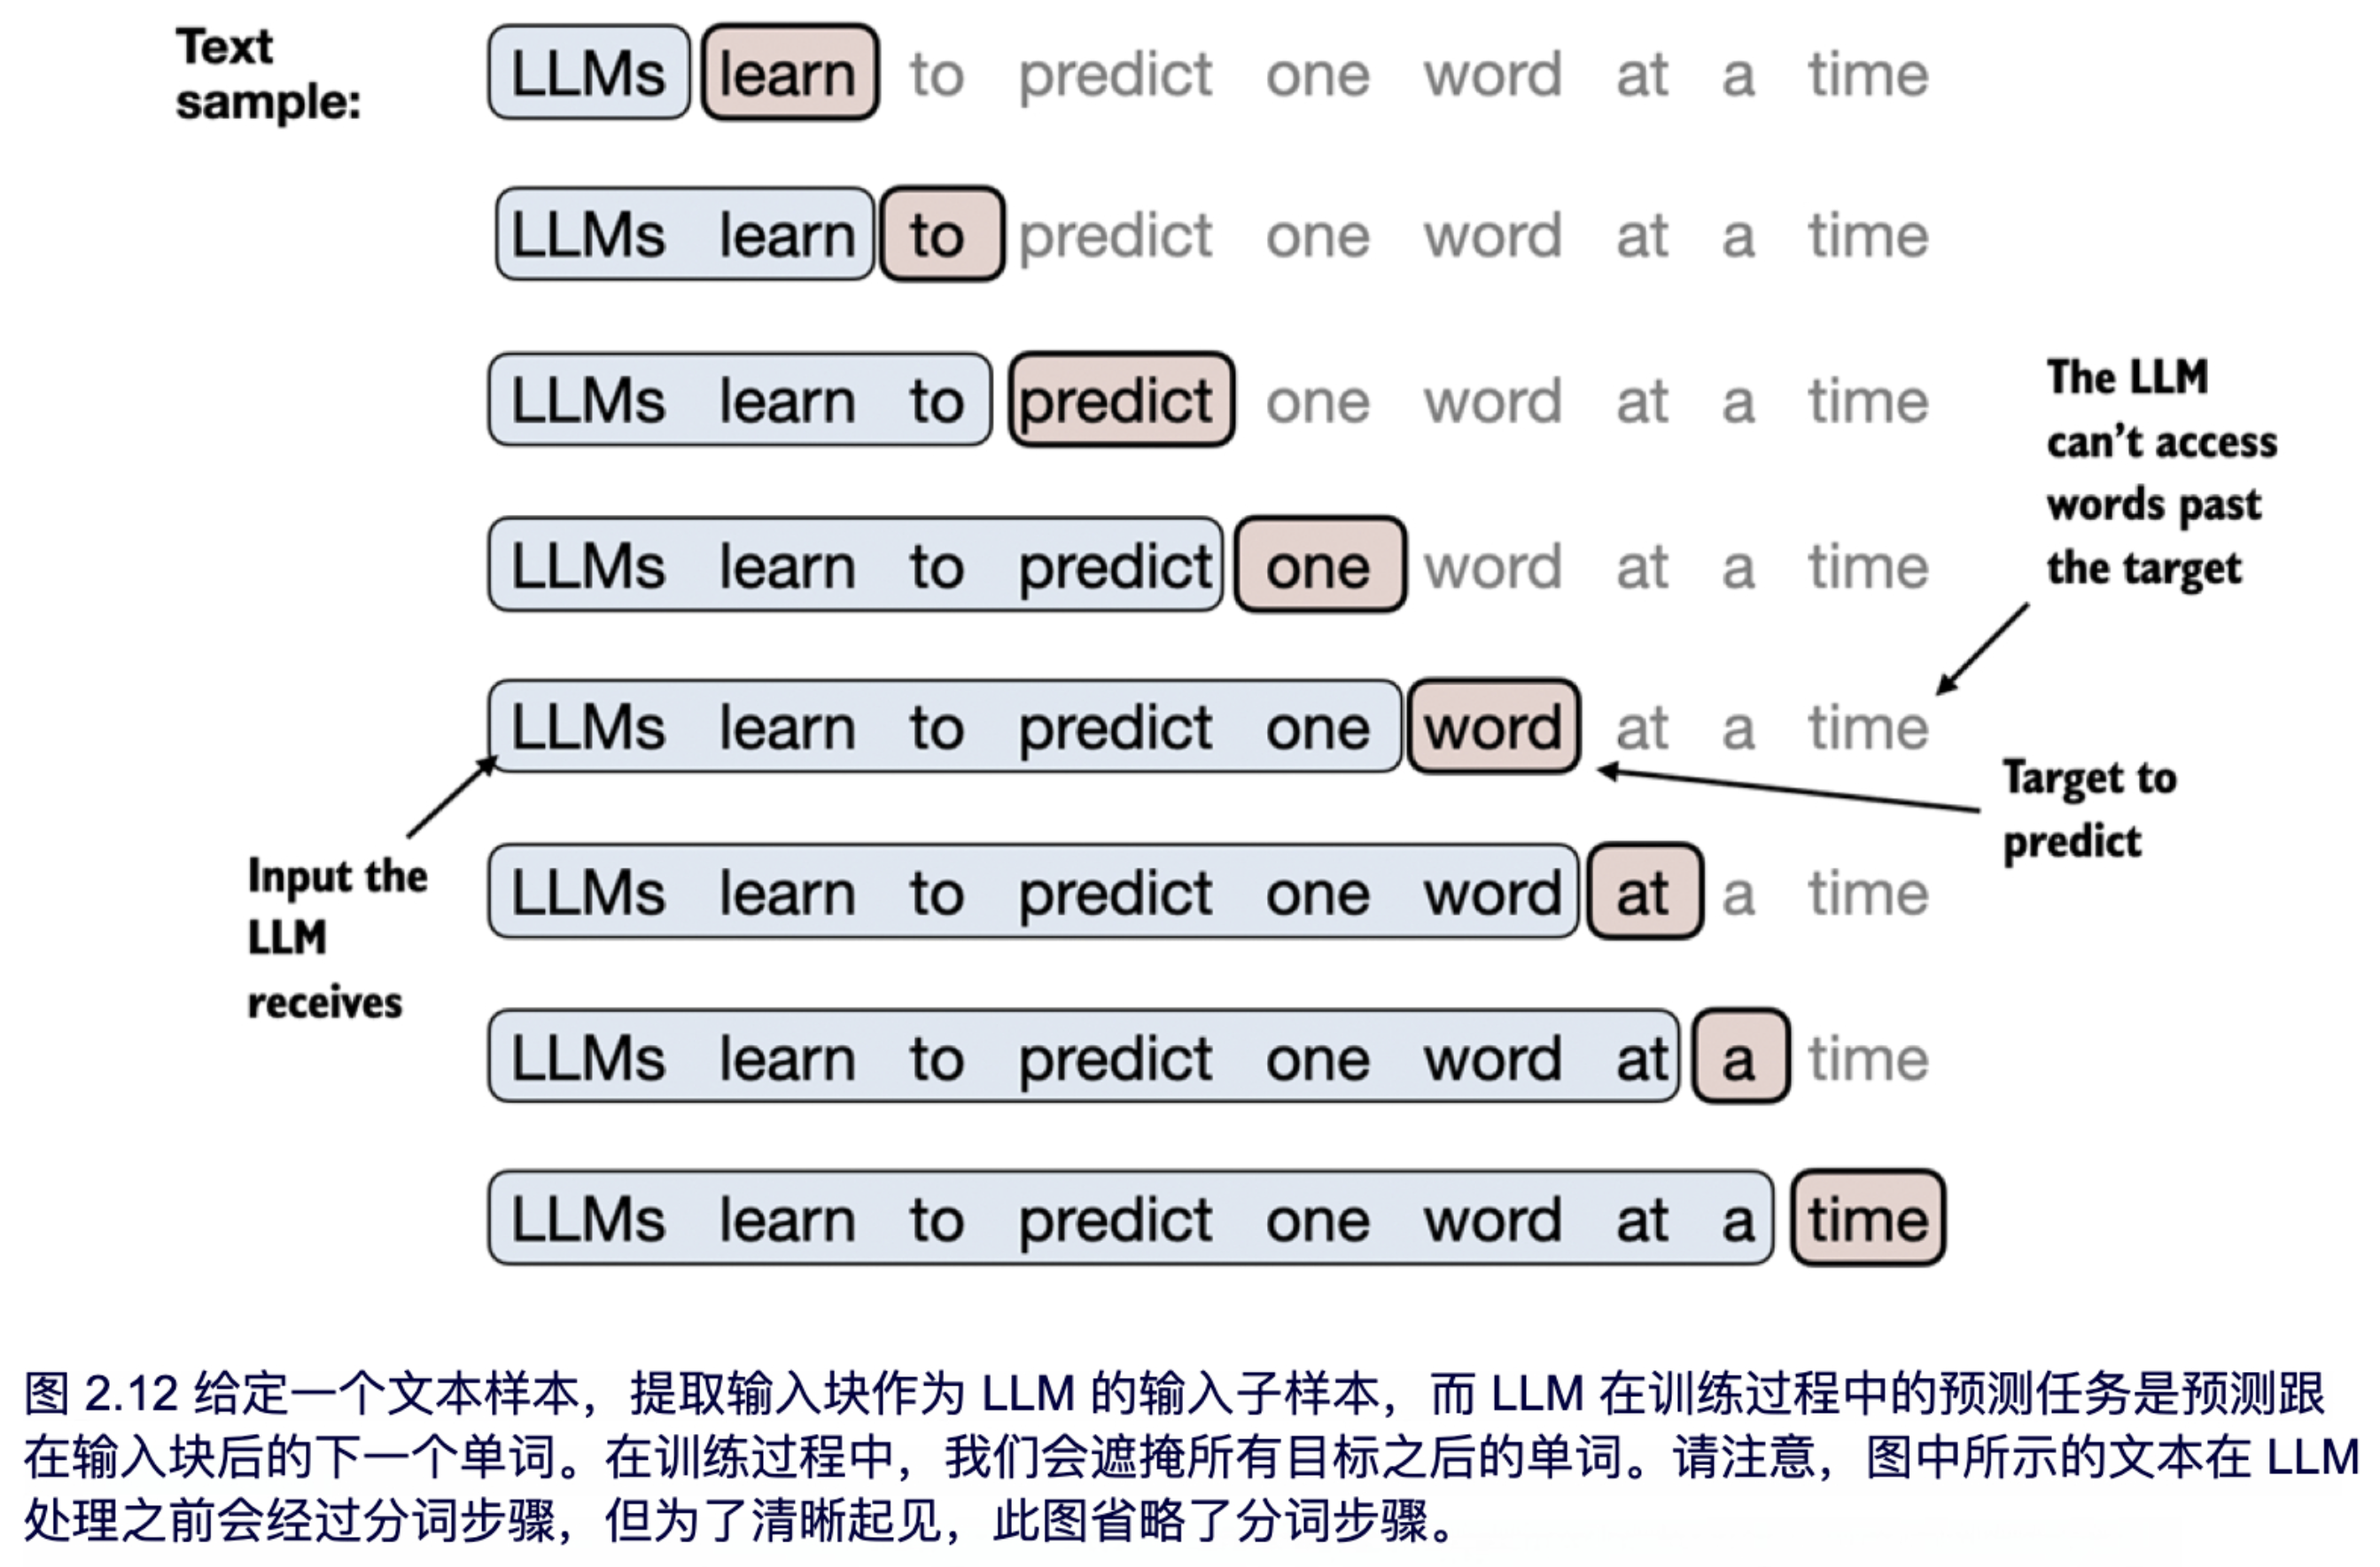

在本节中，我们将实现一个数据加载器，通过滑动窗口方法从训练数据集中提取图 2.12 所示的输入-目标对。


In [100]:
# 利用tiktoken对the-verdict.txt进行分词

tokenizer = tiktoken.get_encoding("gpt2")
with open(data_path,"r",encoding = "utf-8") as f:
    text = f.read()
enc_text = tokenizer.encode(text)
print(len(integear))

5145


In [101]:
# 从数据集中移除前50个token以便演示，因为这会在接下来的步骤中产生稍微更有趣的文本段落。

enc_sample = enc_text[50:]

In [102]:
# 创建输入-目标对以进行下一个单词预测任务的最简单和最直观的方法之一是创建两个变量x和y，其中x包含输入token，y包含目标，即输入向右移动1位的结果。

context_size = 4
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x:{x}")
print(f"y:      {y}")

x:[290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [103]:
# 在处理输入和目标（即输入向后移动一个位置）后，我们可以创建如图 2.12 所示的下一个单词预测任务，如下所示：

for i in range(1,context_size+1):
    context = enc_sample[:i]
    prediction = enc_sample[i]
    print(f"{context} -> {prediction}")
    

[290] -> 4920
[290, 4920] -> 2241
[290, 4920, 2241] -> 287
[290, 4920, 2241, 287] -> 257


In [105]:
# 在处理输入和目标（即输入向后移动一个位置）后，我们可以创建如图 2.12 所示的下一个单词预测任务，如下所示：

for i in range(1,context_size+1):
    context = enc_sample[:i]
    prediction = enc_sample[i]
    print(f"{tokenizer.decode(context)} -> {tokenizer.decode([prediction])}")


 and ->  established
 and established ->  himself
 and established himself ->  in
 and established himself in ->  a


我们现在已经创建了输入-目标对，可以在接下来的章节中应用于 LLM 的训练。

在我们将token转换为嵌入之前，还有一个任务要完成，正如我们在本章开始时提到的：实现一个高效的数据加载器，该加载器遍历输入数据集并将输入和目标作为 PyTorch 张量返回，这些张量可以视为多维数组。

具体来说，我们的目标是返回两个张量：一个输入张量，包括 LLM 看到的文本，另一个目标张量，包含 LLM 需要预测的目标，如图 2.13 所示。

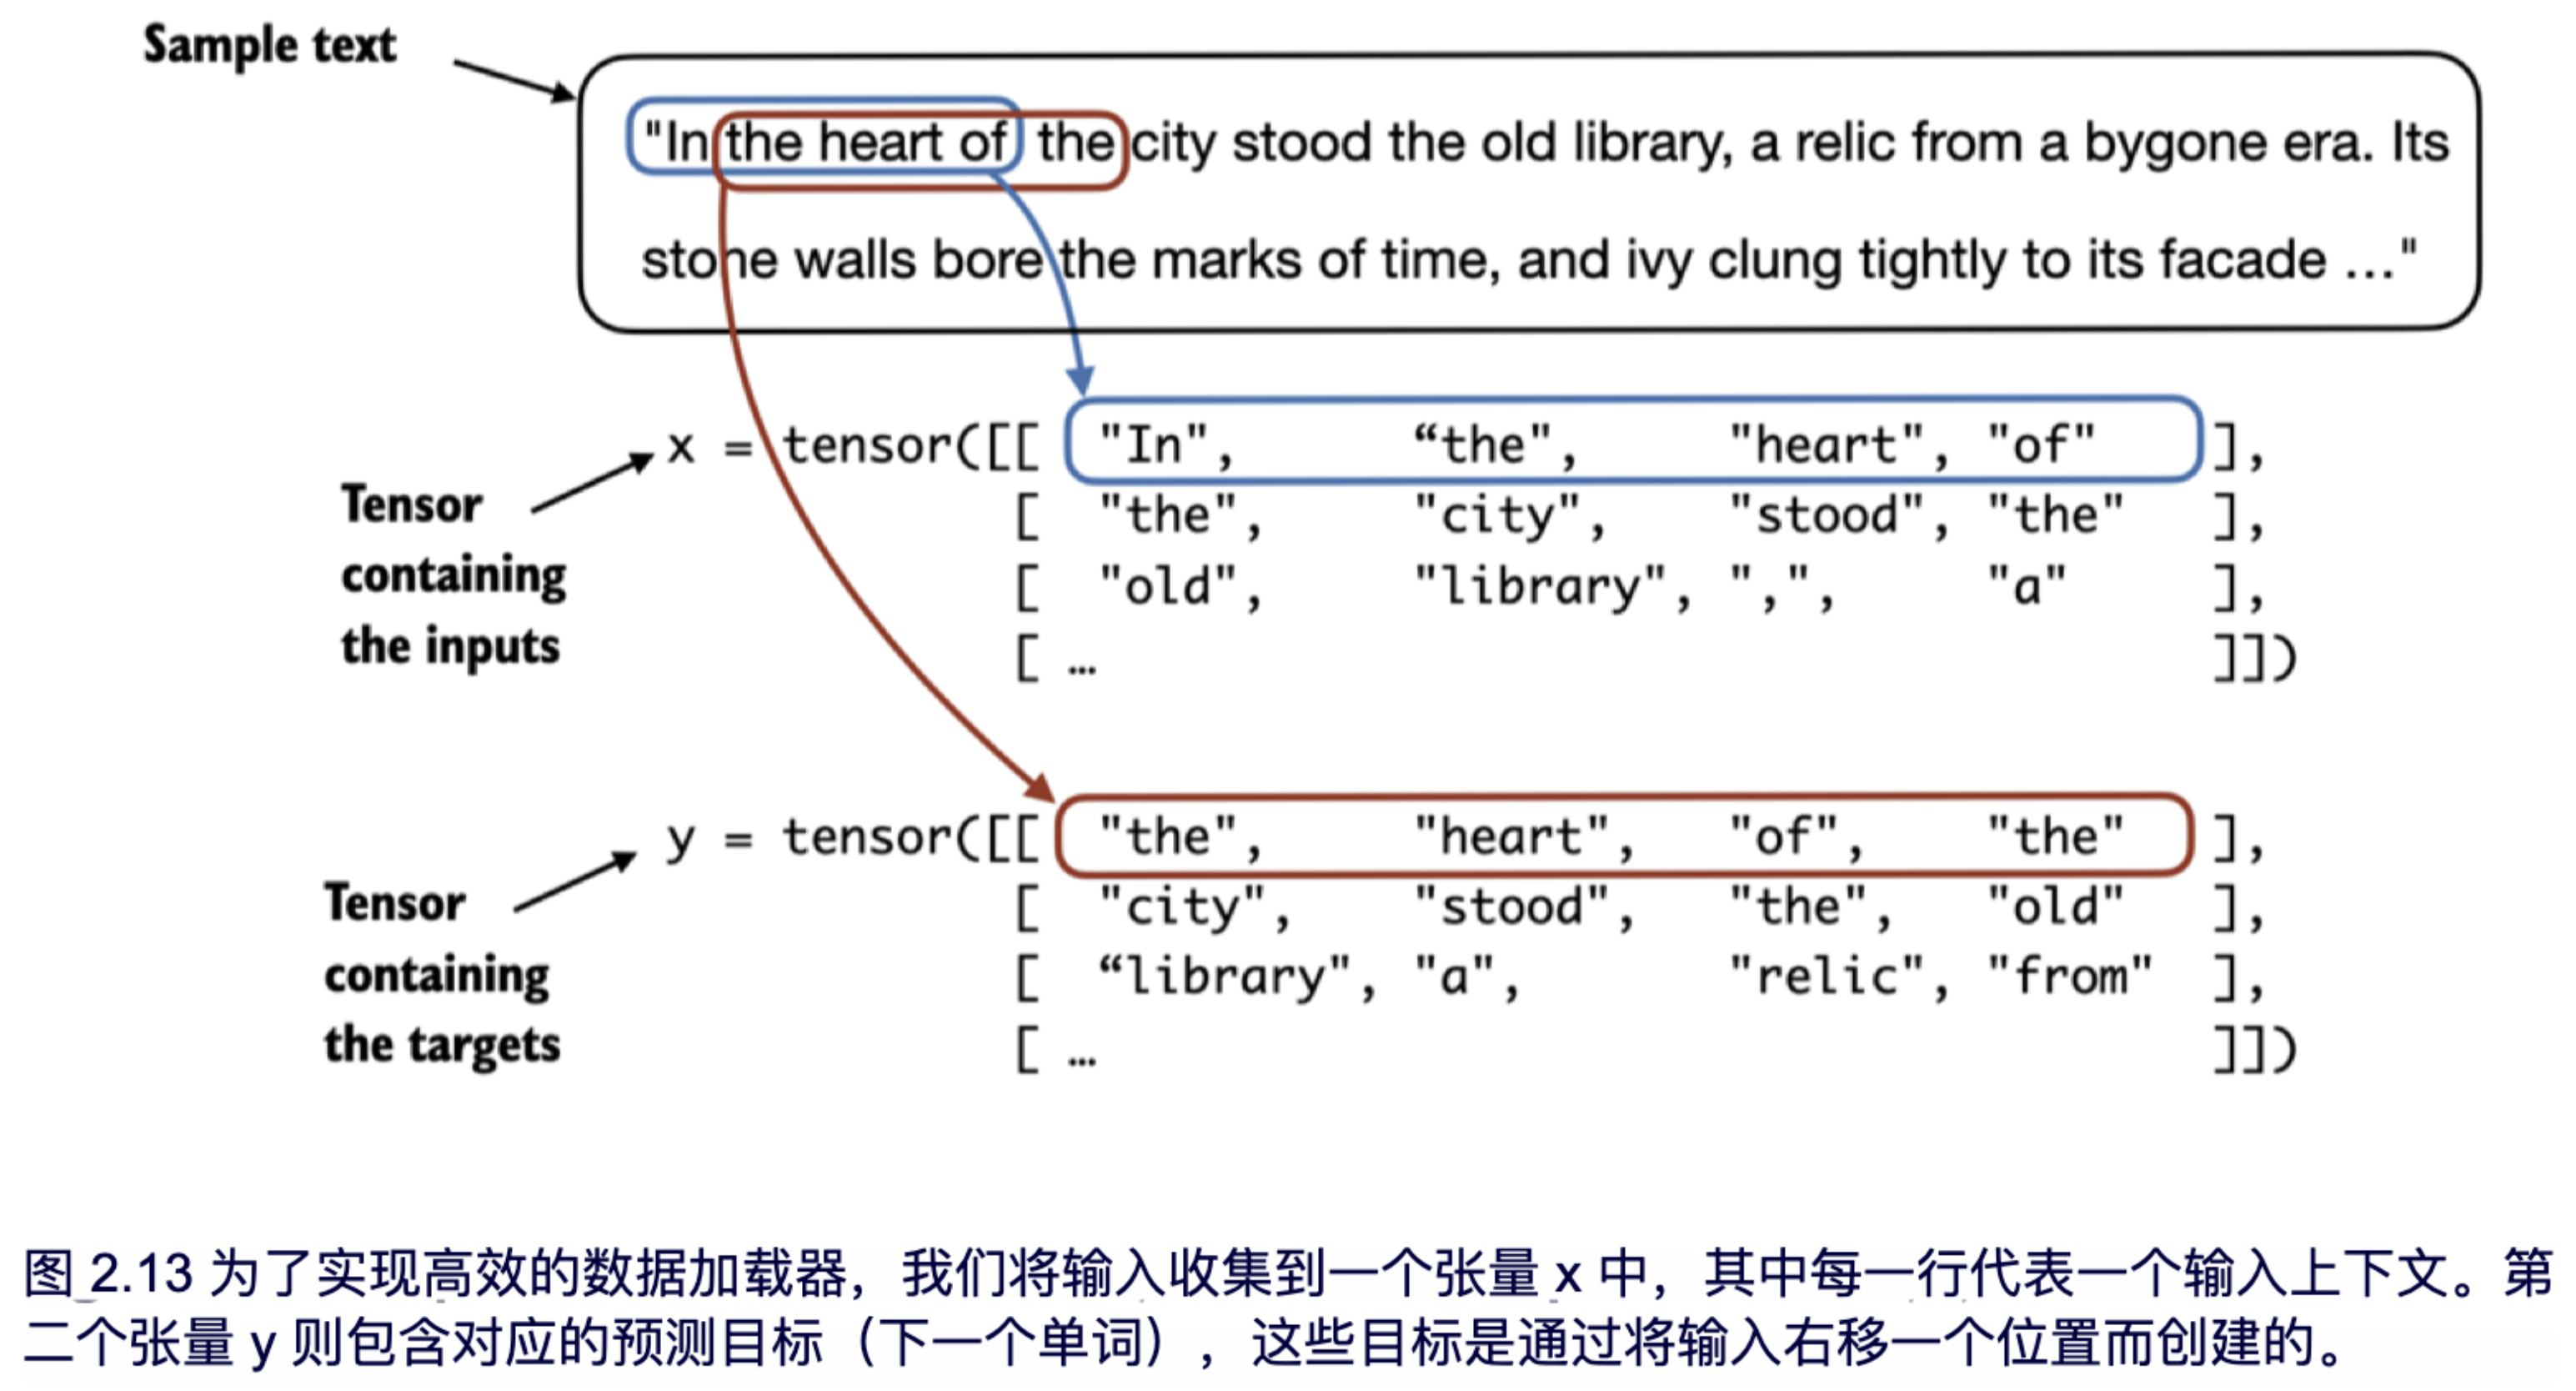

虽然图2.13展示了字符串格式的token以供说明，但代码实现将直接操作token ID，因为 BPE 分词器的 encode 方法将分词和转换为token ID 的过程合并为了一个步骤。

为了实现高效的数据加载器，我们将使用 PyTorch 内置的 Dataset 和 DataLoader 类。

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

# TODO:1.将整个文本进行分词
        token_ids = tokenizer.encode(txt)

# TODO:2.使用滑动窗口将书籍分块为最大长度的重叠序列。
        for i in range(0,len(token_ids)-max_length,stride):
            input_chunk = token_ids[i:i+max_length]
            target_chunk = token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

# TODO:3.返回数据集的总行数
    def __len__(self):
        return len(self.input_ids)

# TODO:4.从数据集中返回指定行
    def __getitem__(self,index):
        return self.input_ids[index],self.target_ids[index]


**Note**:

 GPTDatasetV1 类继承自 PyTorch Dataset 类，定义了如何从数据集中提取单行，其中每行由多个token ID（基于 max_length）组成，并赋值给 input_chunk 张量。target_chunk 张量则包含相应的目标。

In [ ]:
# 以下代码将使用刚创建的 GPTDatasetV1 类，通过 PyTorch DataLoader 以批量方式加载输入

def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True, num_workers=0):
    # 初始化分词器
    tokenizer = tiktoken.get_encoding("gpt2")         
    # 创建GPTDatasetV1类
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    dataloader = DataLoader(
          dataset,
          batch_size=batch_size,
          shuffle=shuffle,          # shuffle 是数据加载器中的一个布尔参数，用于控制是否随机打乱数据顺序
          drop_last=drop_last,      # drop_last=True会在最后一批次小于指定的batch_size时丢弃该批次，以防止训练期间的损失峰值                                     
          num_workers=0             # 用于预处理的CPU进程数量                                          
    )

    return dataloader

In [114]:
# 设置 batch_size = 1 和 max_length = 4，观察GPTDatasetV1 类和create_dataloader_v1函数如何协同工作

with open("the-verdict.txt", "r", encoding="utf-8") as f:
        text = f.read()

dataloader = create_dataloader_v1(text,batch_size = 1,max_length = 4,stride = 1, shuffle = False)

# iter()将数据加载器转换为 Python 迭代器，以便通过 Python 的内置 next() 函数获取下一个数据条目。
data_iter = iter(dataloader)    # 创建迭代器           
first_batch = next(data_iter)   # 获取第一个 batch
second_batch = next(data_iter)
print(first_batch)
print(second_batch)



[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]
[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


```python
# 方式1：使用 iter() + next()（手动控制）
data_iter = iter(dataloader)
first_batch = next(data_iter)   # 第1个batch
second_batch = next(data_iter)  # 第2个batch

# 方式2：直接用 for 循环（自动迭代）
for batch in dataloader:
    print(batch)  # 自动遍历所有 batch
```
first_batch 变量包含两个张量：第一个张量存储输入token ID，第二个张量存储目标token ID。由于 max_length 设置为 4，因此这两个张量各包含 4 个token ID。请注意，输入大小为 4 相对较小，仅用于演示目的。通常，训练 LLM 的输入大小至少为 256。

## 练习2.2

为了更好地理解数据加载器的工作原理，请尝试使用不同的设置进行测试，例如 max_length=2 和 stride=2，以及 max_length=8 和 stride=2。

In [118]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
        text = f.read()
dataloader_exam0 = create_dataloader_v1(text,batch_size = 1,max_length = 2,stride = 2, shuffle = False)
data_iter = iter(dataloader_exam0)
inputs0, targets0 = next(data_iter)
inputs1, targets1 = next(data_iter)

print(f"input0 tensor: {inputs0}")
print(f"target0 tensor: {targets0}")

print(f"input1 tensor: {inputs1}")
print(f"target1 tensor: {targets1}")

input0 tensor: tensor([[ 40, 367]])
target0 tensor: tensor([[ 367, 2885]])
input1 tensor: tensor([[2885, 1464]])
target1 tensor: tensor([[1464, 1807]])


In [119]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
        text = f.read()
dataloader_exam1 = create_dataloader_v1(text,batch_size = 1,max_length = 8,stride = 2, shuffle = False)
data_iter = iter(dataloader_exam1)
inputs0, targets0 = next(data_iter)
inputs1, targets1 = next(data_iter)

print(f"input0 tensor: {inputs0}")
print(f"target0 tensor: {targets0}")

print(f"input1 tensor: {inputs1}")
print(f"target1 tensor: {targets1}")

input0 tensor: tensor([[  40,  367, 2885, 1464, 1807, 3619,  402,  271]])
target0 tensor: tensor([[  367,  2885,  1464,  1807,  3619,   402,   271, 10899]])
input1 tensor: tensor([[ 2885,  1464,  1807,  3619,   402,   271, 10899,  2138]])
target1 tensor: tensor([[ 1464,  1807,  3619,   402,   271, 10899,  2138,   257]])


In [120]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
        text = f.read()
dataloader_exam2 = create_dataloader_v1(text,batch_size = 8,max_length = 4,stride = 4, shuffle = False)
data_iter = iter(dataloader_exam2)
inputs0, targets0 = next(data_iter)
inputs1, targets1 = next(data_iter)

print(f"input0 tensor: {inputs0}")
print(f"target0 tensor: {targets0}")

print(f"input1 tensor: {inputs1}")
print(f"target1 tensor: {targets1}")

input0 tensor: tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
target0 tensor: tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])
input1 tensor: tensor([[  287,   262,  6001,   286],
        [  465, 13476,    11,   339],
        [  550,  5710,   465, 12036],
        [   11,  6405,   257,  5527],
        [27075,    11,   290,  4920],
        [ 2241,   287,   257,  4489],
        [   64,   319,   262, 34686],
        [41976,    13,   357, 10915]])
target1 tensor: tensor([[  262,  6001, 

**Note**: 请注意，以上代码将步幅增加到了 4。这是为了全面利用数据集（我们不跳过任何单词），同时避免批次之间的重叠，因为更多的重叠可能会导致过拟合

## 构建词嵌入层

嵌入层，将token ID 转换为连续的向量表示，这些表示将用作 LLM 的输入数据格式。

为 LLM 准备训练集的最后一步是将token ID 转换为嵌入向量，如图 2.15 所示，这将是本章最后两部分的主要内容。

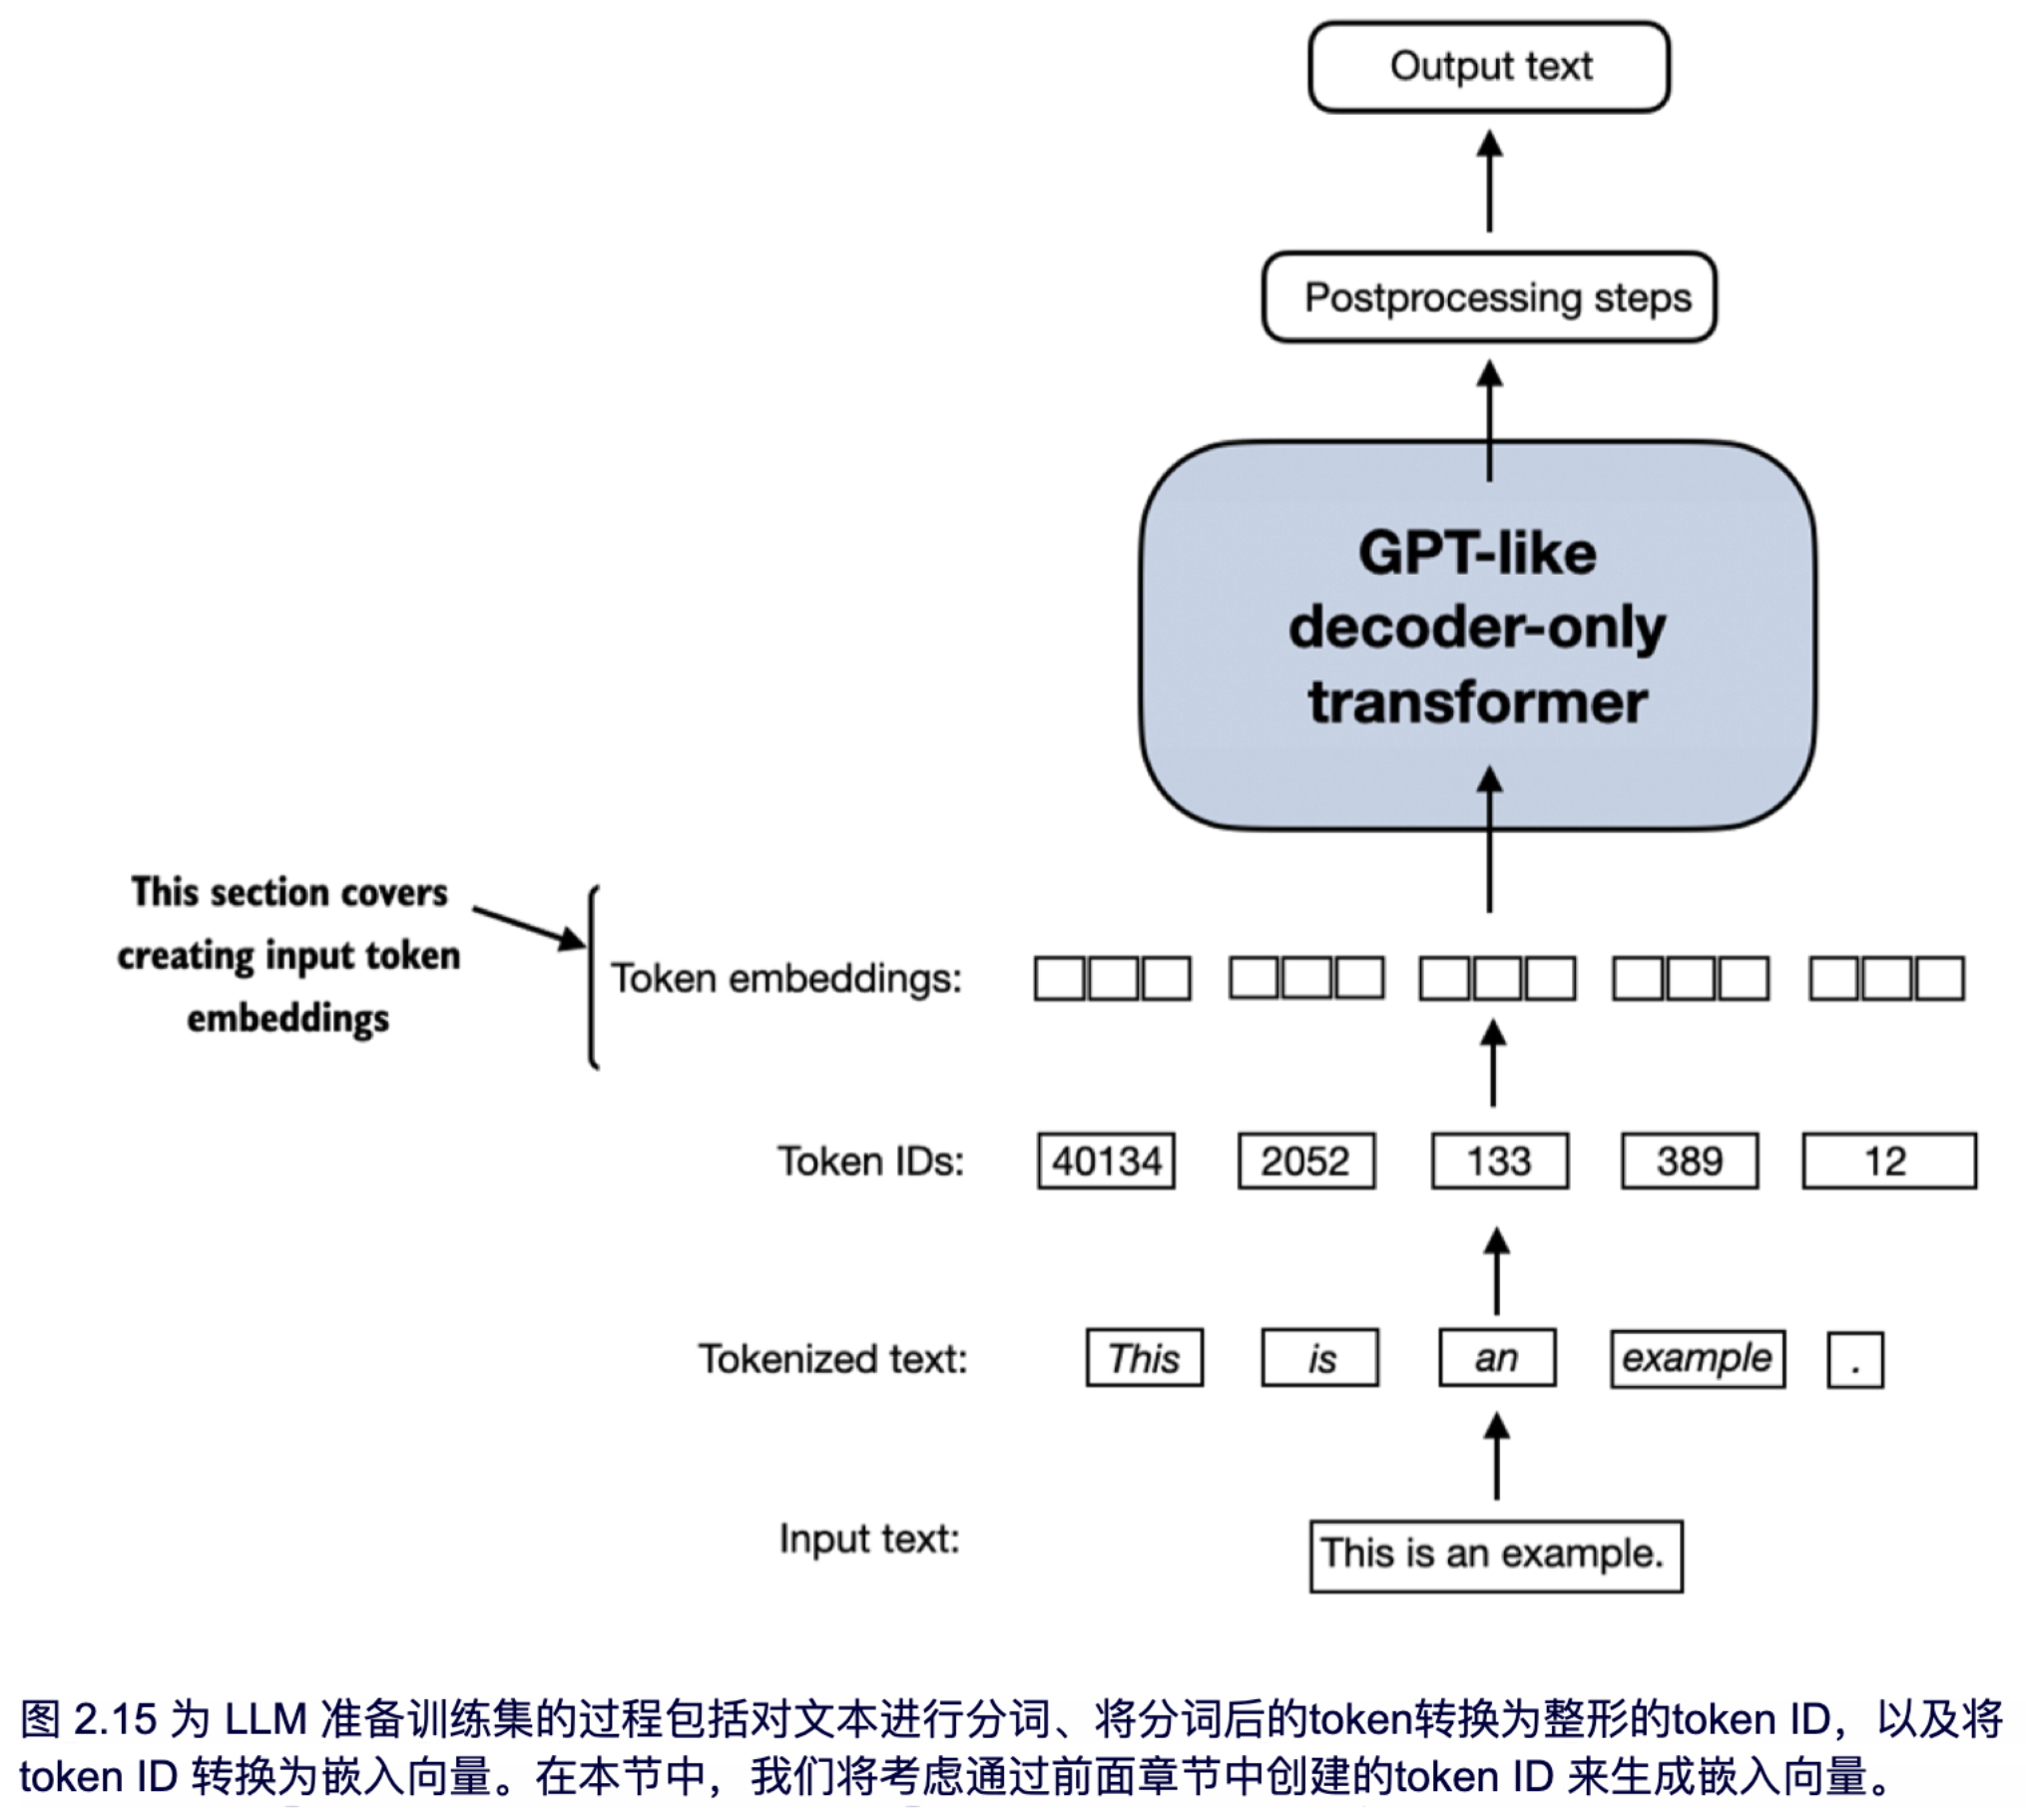

[!TIP]

**个人思考**： 上面一段描述说的有些笼统，为什么通过反向传播算法训练的大语言模型必须具有Embedding，让我们通过以下几个方面来分析和思考：

1. 深度神经网络和连续向量表示

    GPT 类模型（以及其他深度神经网络）是基于大量的矩阵运算和数值计算构建的，尤其是神经元之间的连接权重和偏置在训练过程中不断更新。这些运算要求输入的数据是数值形式的向量，因为神经网络只能对数值数据进行有效计算，而无法直接处理原始的离散文字数据（如单词、句子）。

    向量表示：通过将每个单词、句子或段落转换为连续向量（Embedding），可以在高维空间中表示文本的语义关系。例如，通过词嵌入（如 Word2Vec、GloVe）或上下文嵌入（如 GPT 中的词嵌入层），每个单词都被转换为一个向量，这个向量可以用于神经网络的计算。

2. 向量嵌入的作用

连续向量表示不仅让文本数据可以进入神经网络，还帮助模型捕捉和表示文本之间的语义关系。例如：

* 同义词或相似词：在向量空间中，相似的单词可以有接近的向量表示。这种语义相似性帮助模型理解上下文，并在生成文本时提供参考。

* 上下文关系：GPT 等 LLM 模型不仅依赖单词级别的向量表示，还会考虑句子或段落上下文，形成动态嵌入，从而生成更具连贯性的文本。

3. 反向传播算法的要求

深度神经网络通过反向传播算法进行训练，反向传播的本质是利用梯度下降法来更新网络的权重，以最小化损失函数（loss function）。反向传播要求每一层的输入、输出和权重都能够参与梯度计算，而梯度计算只能应用于数值数据。

* 自动微分与梯度计算：在反向传播中，神经网络会根据损失函数的导数来计算梯度，这个过程依赖于自动微分（automatic differentiation）。为了计算每层的梯度，输入的数据必须是数值形式（即向量），否则无法对离散的文本数据求导。

* 梯度更新权重：每次更新网络权重时，神经网络会根据每一层的输入和输出来调整权重，以更好地学习数据的模式。如果输入不是数值形式，就无法实现梯度更新，从而无法通过反向传播训练网络。

In [121]:
# 让我们通过一个实际示例来说明token ID 到嵌入向量转换的工作原理。假设我们有以下四个输入token，它们的 ID 分别为 2、3、5 和 1

input_ids = torch.tensor([2, 3, 5, 1])

# 为了简化并起到说明的目的，假设我们有一个只有 6 个单词的小词汇表（而不是 BPE 分词器中的 50,257 个单词），并且我们希望创建大小为 3 的嵌入向量（在 GPT-3 中，嵌入大小为 12,288 维）
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


可以看到，嵌入层的权重矩阵由比较小的随机值组成。这些值将在LLM训练过程中作为LLM优化的一部分被优化，正如我们将在接下来的章节中看到的。此外，权重矩阵有六行三列。嵌入矩阵的每一行代表词汇表中的一个token（每个token都有一个唯一的向量表示），而每一列代表嵌入空间中的一个维度（在这个例子中，嵌入维度为3，即每个token被表示为一个3维向量）。

In [ ]:
# 实例化好嵌入层后，我们可以通过它获取指定token ID的嵌入向量

print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [123]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


输出矩阵中的每一行都是通过从嵌入权重矩阵进行查找操作获得的，如图2.16所示。

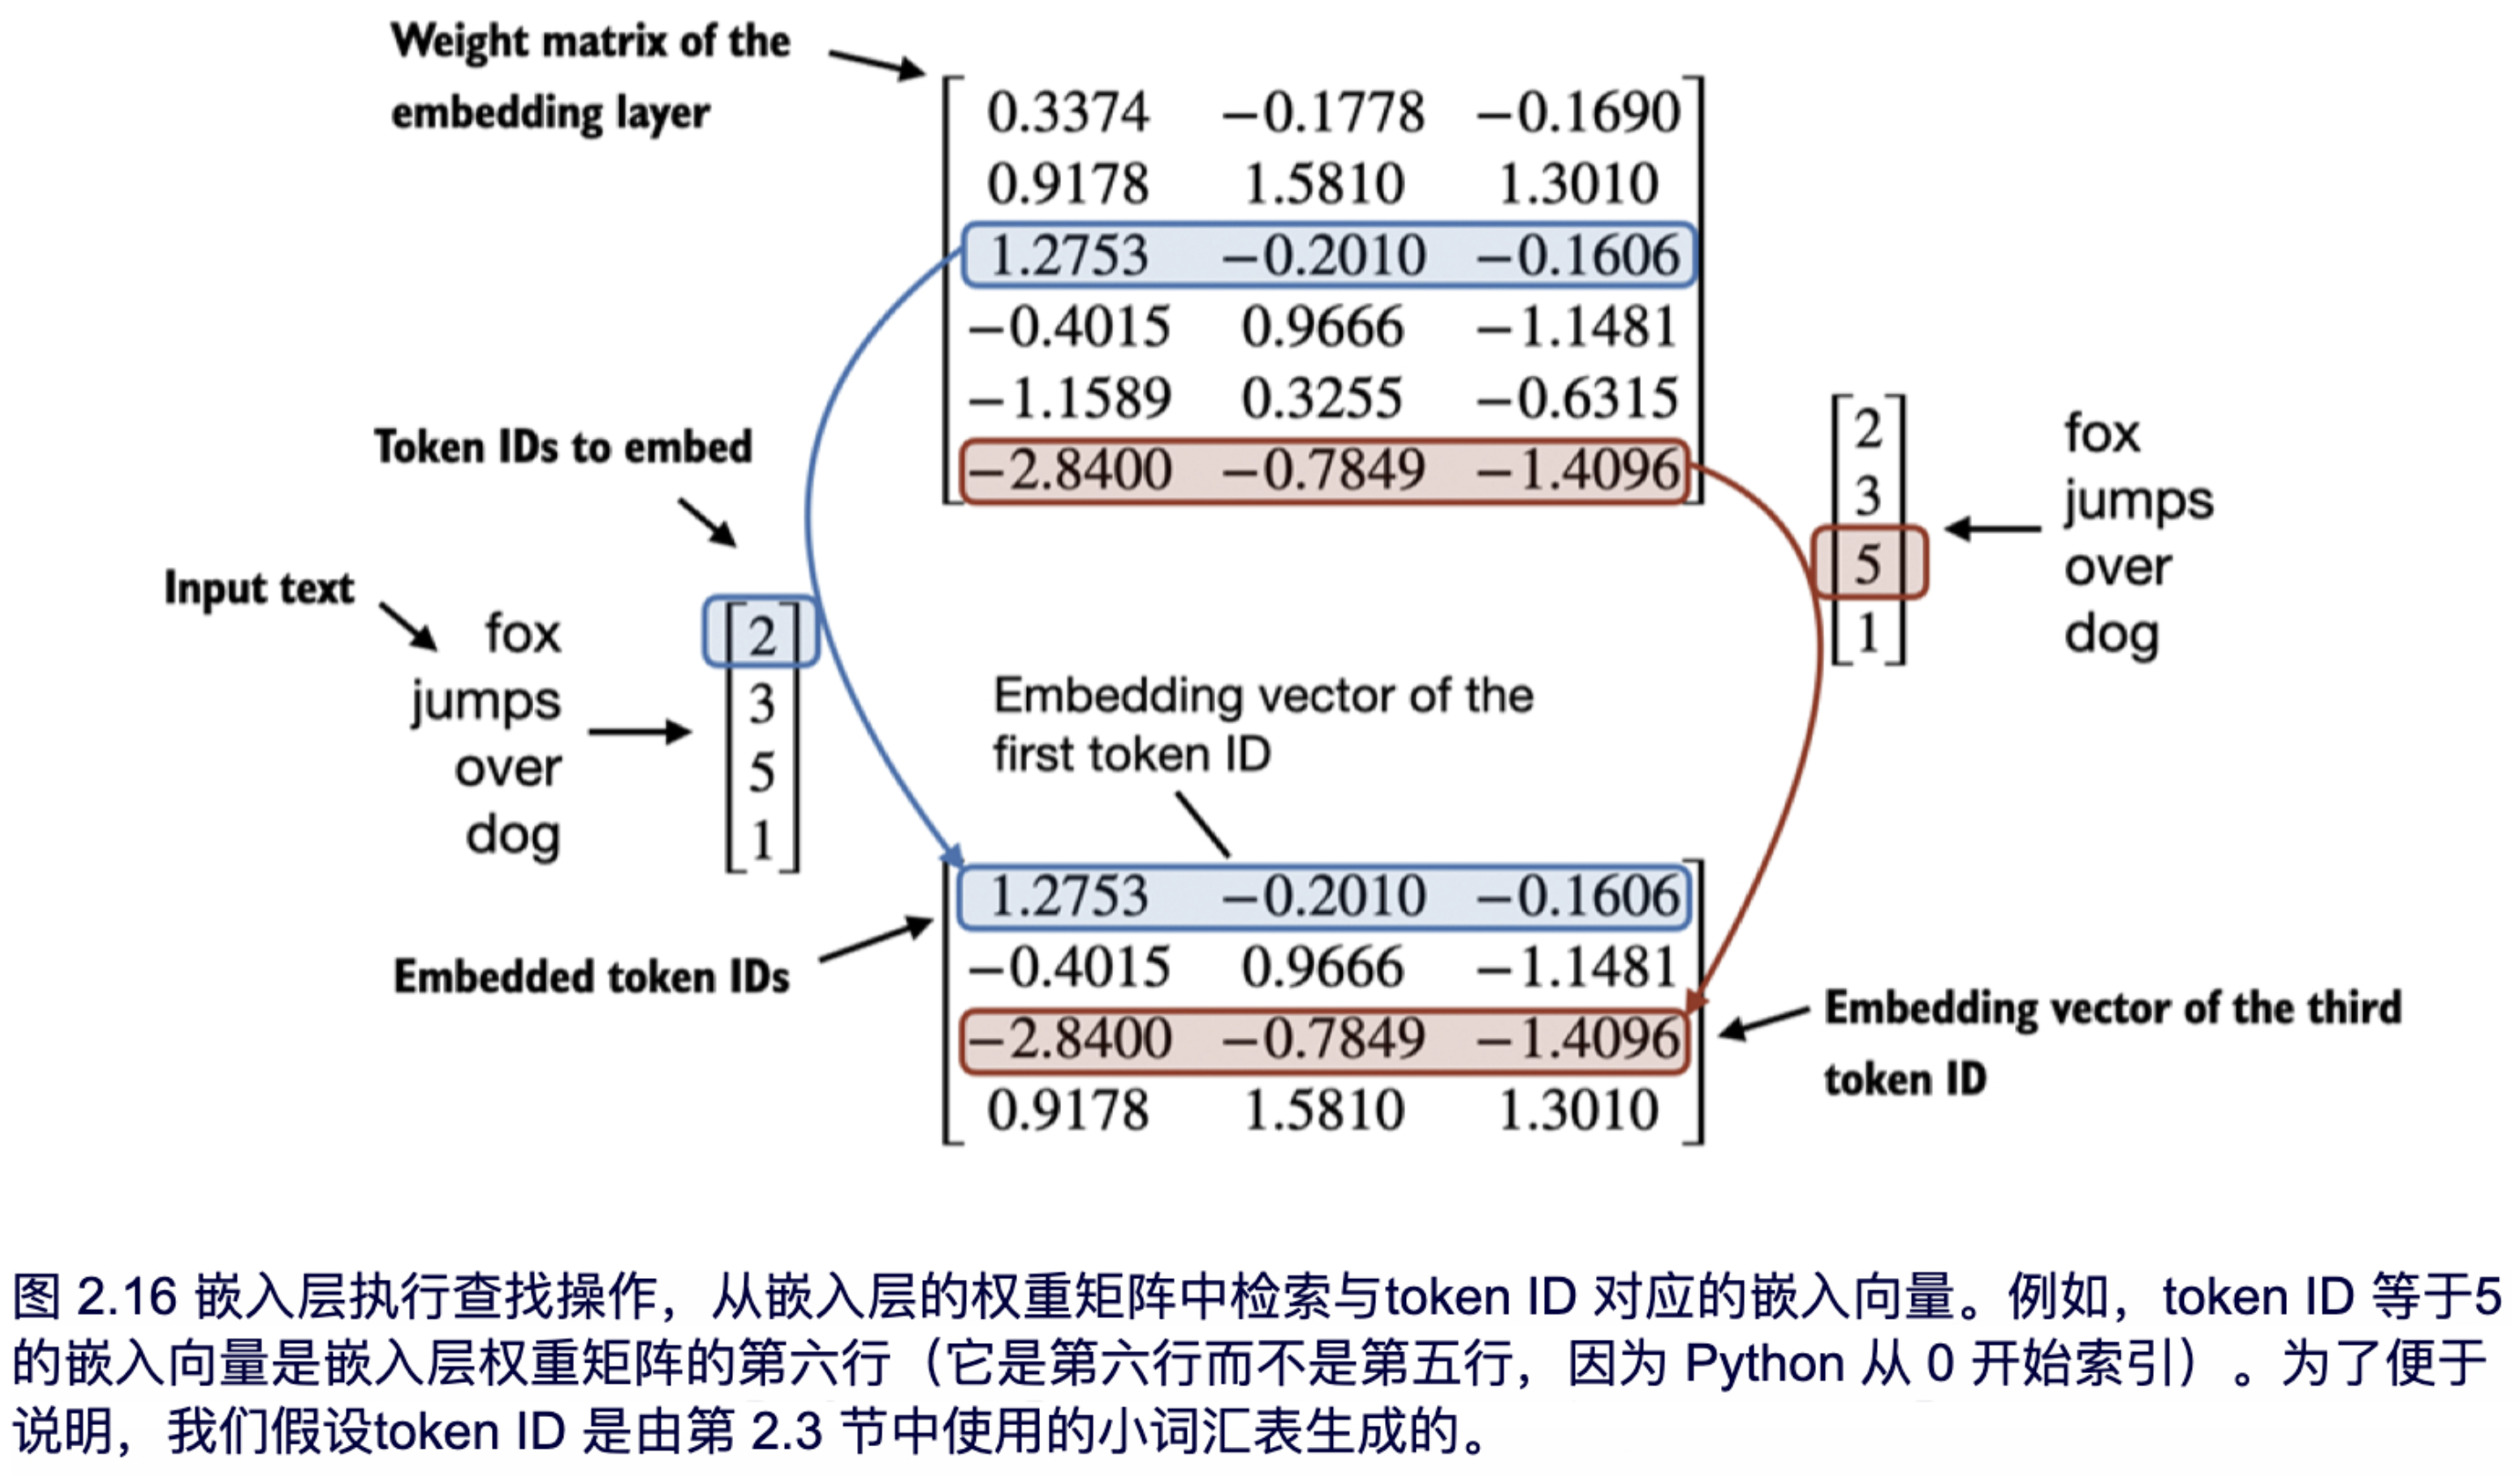

## 位置编码

在上一节中，我们将token ID 转换为连续的向量表示，即所谓的token嵌入。原则上，这适合作为 LLM 的输入。然而，LLM的一个小缺点是它们的自注意力机制（将在第3章详细介绍）对序列中token的位置或顺序没有概念。

之前引入的嵌入层的工作方式是，无论token ID 在输入序列中的位置如何，相同的token ID 始终映射到相同的向量表示，如图 2.17 所示。

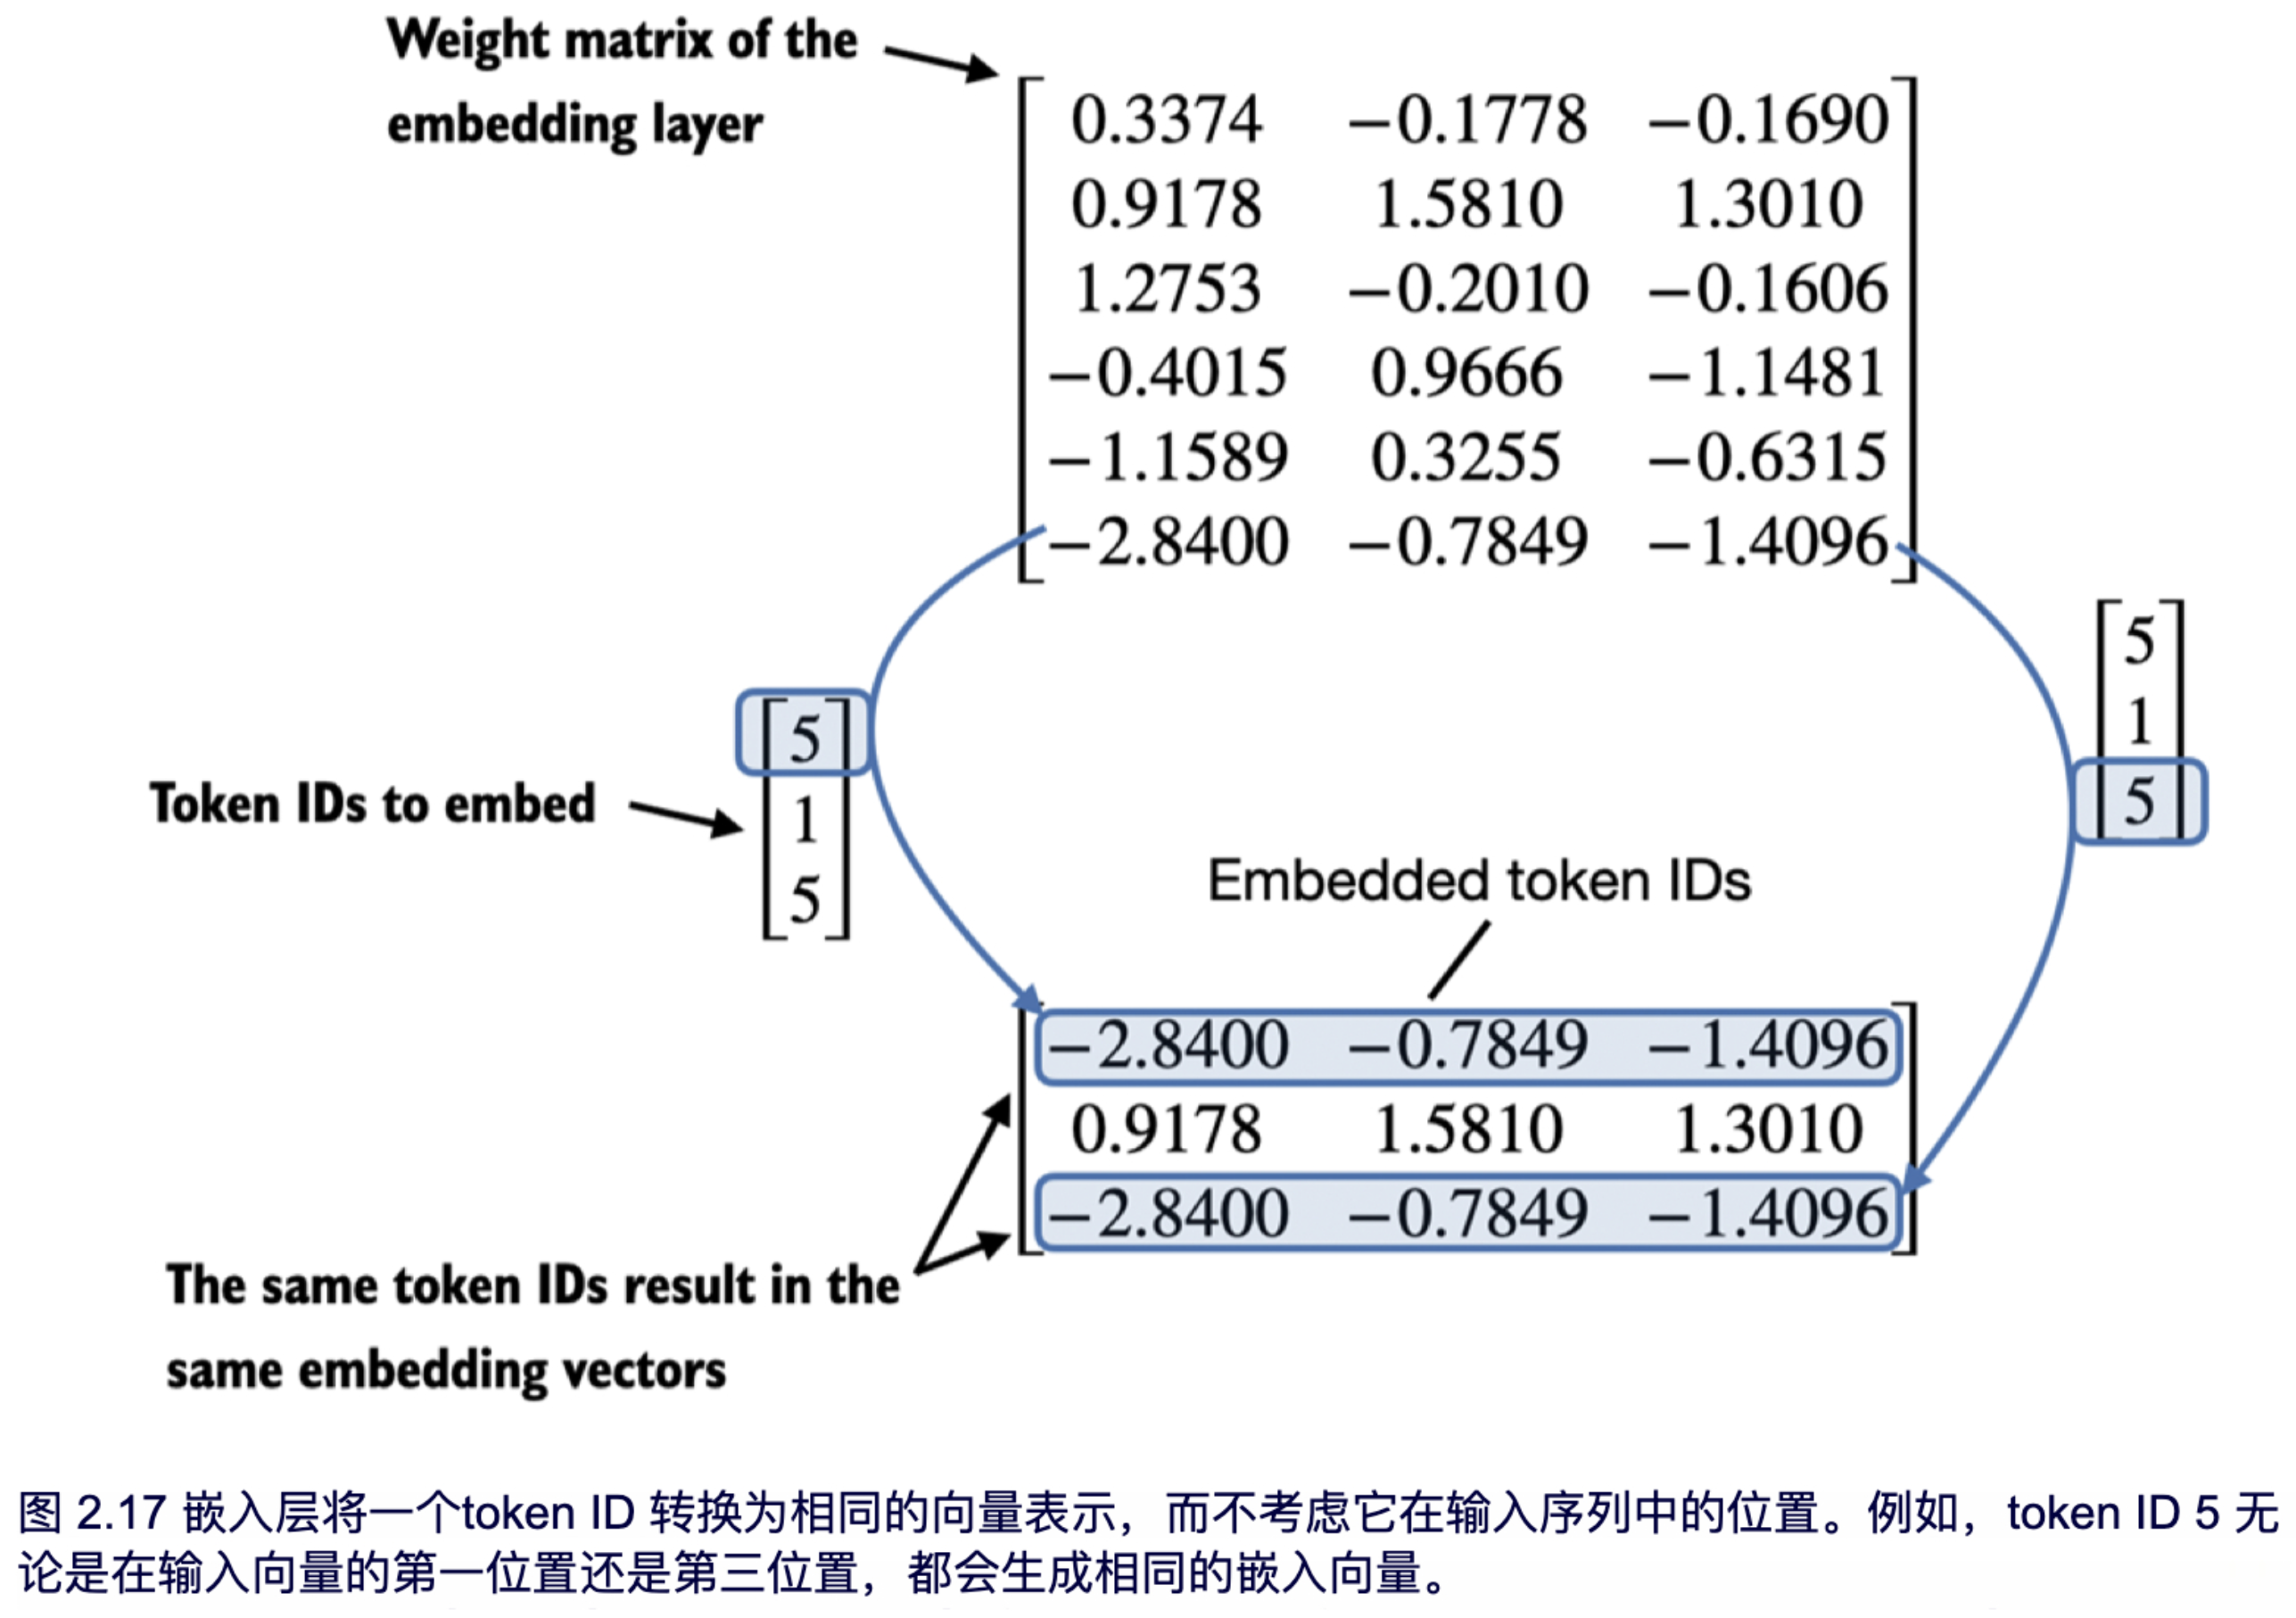

从原则上讲，确定性的、与位置无关的token ID 嵌入对于可重复性是有益的。然而，由于LLM的自注意力机制本身也是与位置无关的，因此向LLM注入额外的位置信息是有帮助的。

绝对位置嵌入与序列中的特定位置直接相关。对于输入序列中的每个位置，都会将一个唯一的绝对位置嵌入向量添加到token的嵌入向量中，以传达其确切位置。例如，第一个token将具有特定的位置嵌入，第二个token将具有另一个不同的嵌入，依此类推，如图2.18所示。

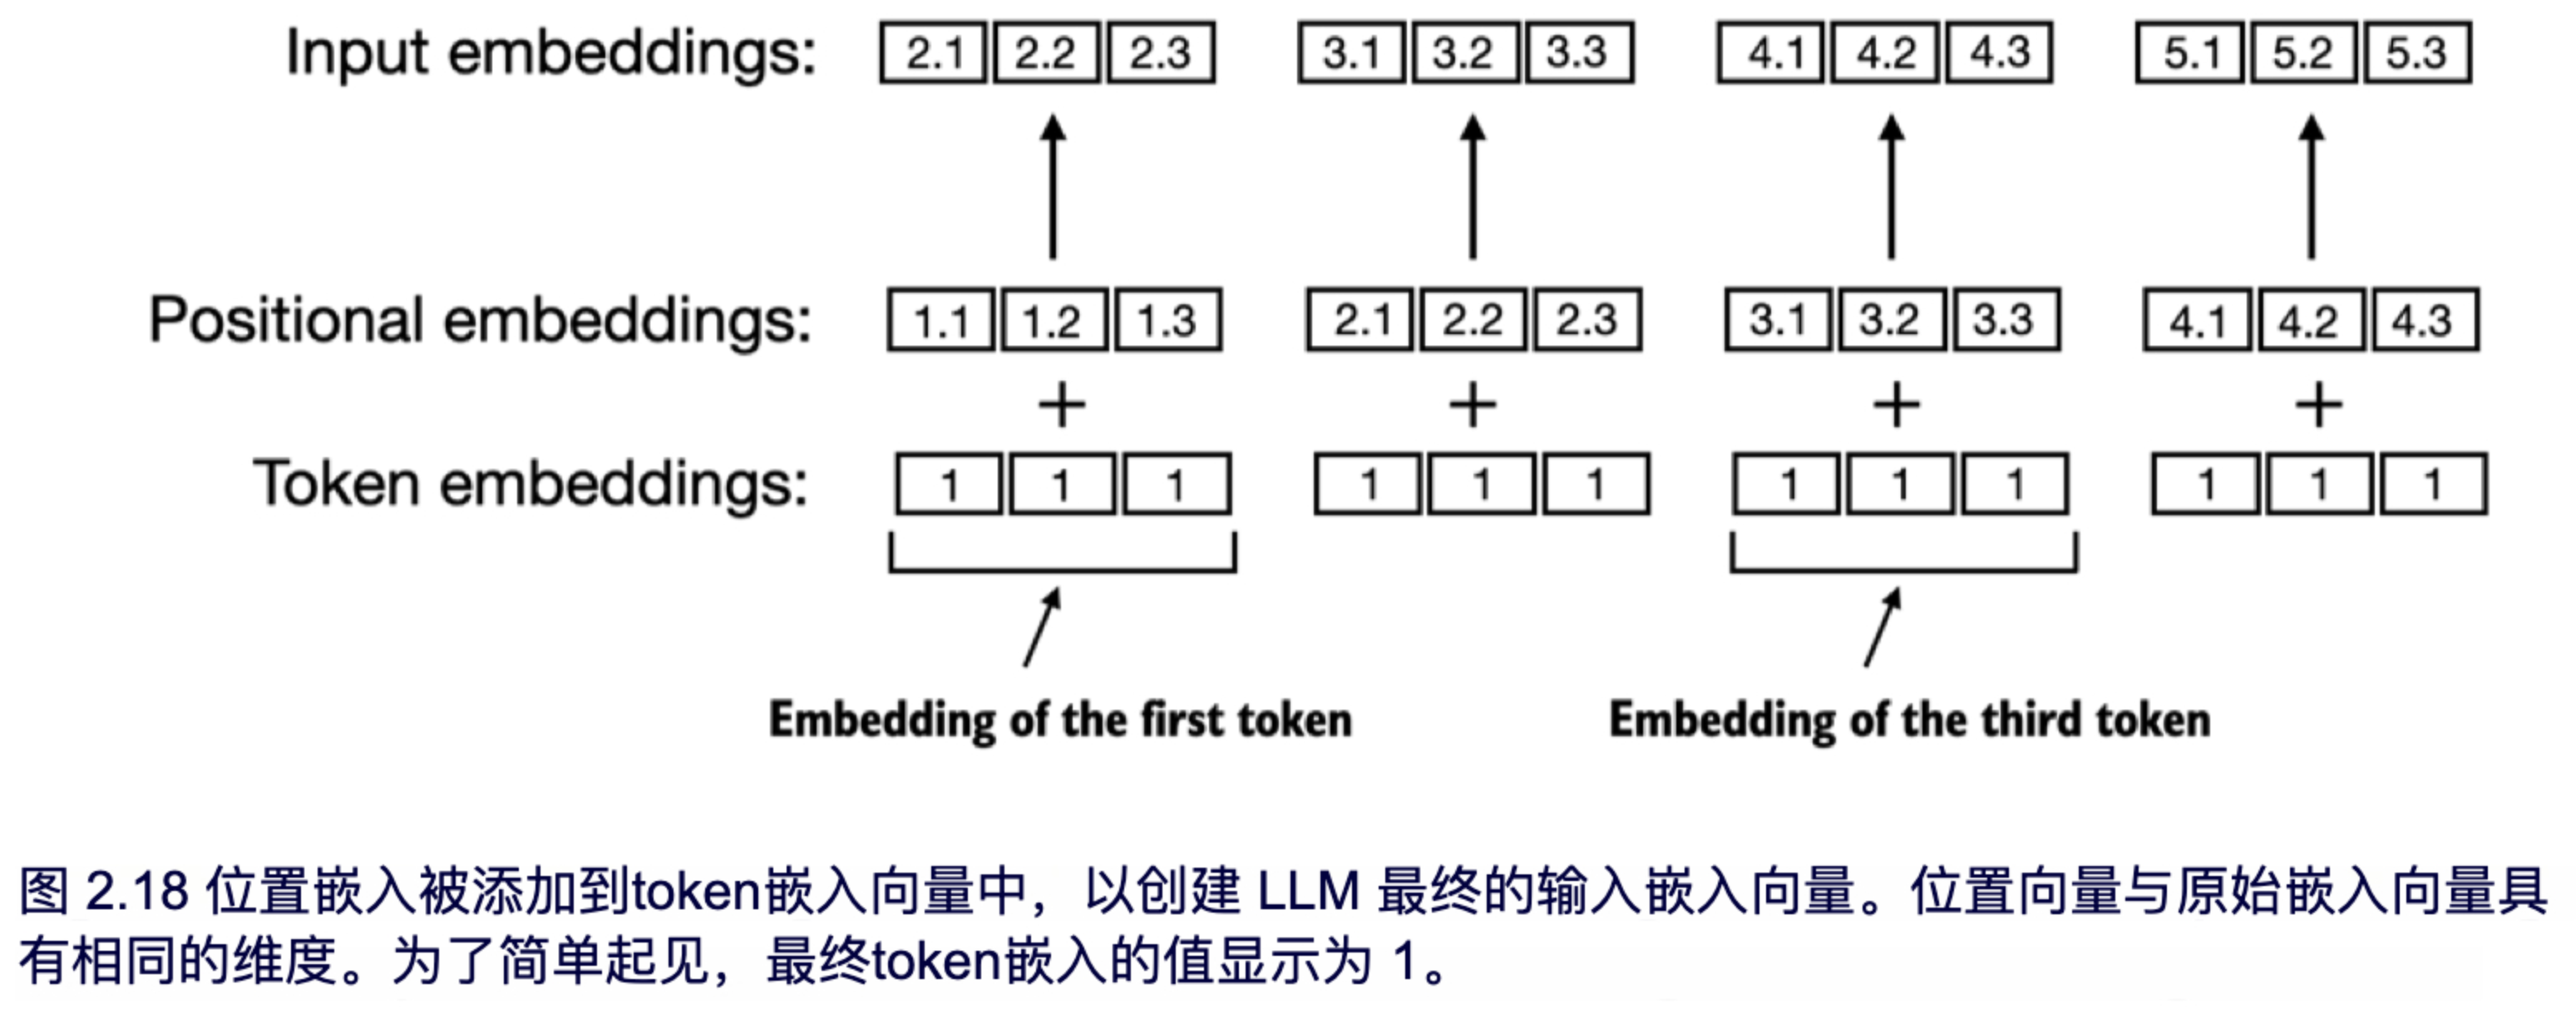

与关注token在序列中的绝对位置不同，相对位置嵌入强调的是token之间的相对位置或距离。这意味着模型学习的是“相隔多远”的关系，而不是“在什么确切位置”。这样的优势在于，即使模型在训练时没有接触过不同的长度，它也可以更好地适应各种长度的序列。

这两种类型的位置嵌入旨在增强 LLM 理解token顺序与关系的能力，从而确保在预测时能对上下文具有更准确的感知。选择哪种类型的位置嵌入通常取决于特定的应用和所处理数据的性质。

OpenAI 的 GPT 模型使用绝对位置嵌入，这些嵌入在训练过程中进行优化，而不是像原始 Transformer 模型中的位置编码那样是固定或预定义的。这个优化过程属于模型训练的一部分，我们将在本书后面的章节中实现。目前，让我们创建初始位置嵌入，以便为接下来的章节准备 LLM 输入。

之前，我们在本章中专注于非常小的嵌入大小以便于说明。我们现在考虑更现实和有用的嵌入大小，并将输入token编码为256维的向量表示。这比原始的GPT-3模型使用的要小（在GPT-3中，嵌入大小为12,288维），但对于实验仍然是合理的。此外，我们假设token ID 是由我们之前实现的BPE分词器创建的，该分词器的词汇量为50,257：

In [136]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size,output_dim)

#使用上面的 token_embedding_layer，如果我们从数据加载器中采样数据，我们将每个批次中的每个token嵌入到一个 256 维的向量中。如果我们的批次大小为 8，每个批次有四个token，那么结果将是一个形状为 8 x 4 x 256 的张量。

# 首先，让我们实例化 2.6 节中创建的数据加载器，使用滑动窗口进行数据采样

max_length = 4
dataloader = create_dataloader_v1(text,batch_size = 8,max_length = max_length, stride = max_length)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
# print("Token IDs:\n", inputs)
# print("\nInputs shape:\n", inputs.shape)

# 使用嵌入层将这些token ID 转换为 256 维的向量
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [142]:
# 对于 GPT 模型所使用的绝对嵌入方法，我们只需创建另一个嵌入层，其维度与 token_embedding_layer 的维度相同

context_length = max_length
pos_embedding_layer = torch.nn.Embedding(vocab_size,output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings)
print(pos_embeddings.shape)


tensor([[-0.2181, -1.0565,  0.3770,  ...,  0.2215,  0.8864, -1.5461],
        [-1.2885, -1.3325,  1.3916,  ..., -0.2341,  0.7794, -1.7293],
        [ 2.2209, -1.1334, -1.7583,  ..., -0.1357, -1.3666,  0.0909],
        [-1.2999, -1.4877, -1.7355,  ...,  0.8865, -1.5837,  0.2743]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 256])


In [140]:
# 正如我们所见，位置嵌入张量由四个 256 维向量组成。我们现在可以将这些直接添加到token嵌入中，在每个批次中，PyTorch 会将 4x256 维的 pos_embeddings 张量添加到每个 4x256 维的token嵌入张量中

input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])
